# EDA

## Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from cnr_methods import get_simplified_data

sns.set_style('darkgrid')

## Read Data

Here we get the same Simplified Data obtained in the preprocess.ipynb Notebook.

In [2]:
full_data,y_train = get_simplified_data()

To do faster plottings, here we convert the Time Column to Datetime format.

In [3]:
full_data['Time'] = pd.to_datetime(full_data['Time'],dayfirst=True)

In [4]:
full_data.head()

,ID,Time,WF,U_100m,V_100m,U_10m,V_10m,T,CLCT,Set
0,1,2018-05-01 01:00:00,WF1,-2.248500,-3.257800,1.254603,-0.289687,286.440,82.543144,Train
1,2,2018-05-01 02:00:00,WF1,-2.434500,-1.446100,2.490908,-0.413370,286.260,99.990844,Train
2,3,2018-05-01 03:00:00,WF1,-1.220571,-0.266871,0.997093,-1.415138,286.575,98.367235,Train
3,4,2018-05-01 04:00:00,WF1,3.706500,-6.217400,0.689598,-0.961441,284.780,94.860604,Train
4,5,2018-05-01 05:00:00,WF1,3.813400,-5.444600,0.290994,-0.294963,284.460,95.905879,Train


## Univariate Analysis

Let's start by first checking all the features time series (Train + Test). For this analysis, we will only use data from One Wind Farm.

In [5]:
WF = 'WF1'
wf = full_data[full_data['WF']==WF]

Text(0.5, 1.0, 'Cloud Cover')

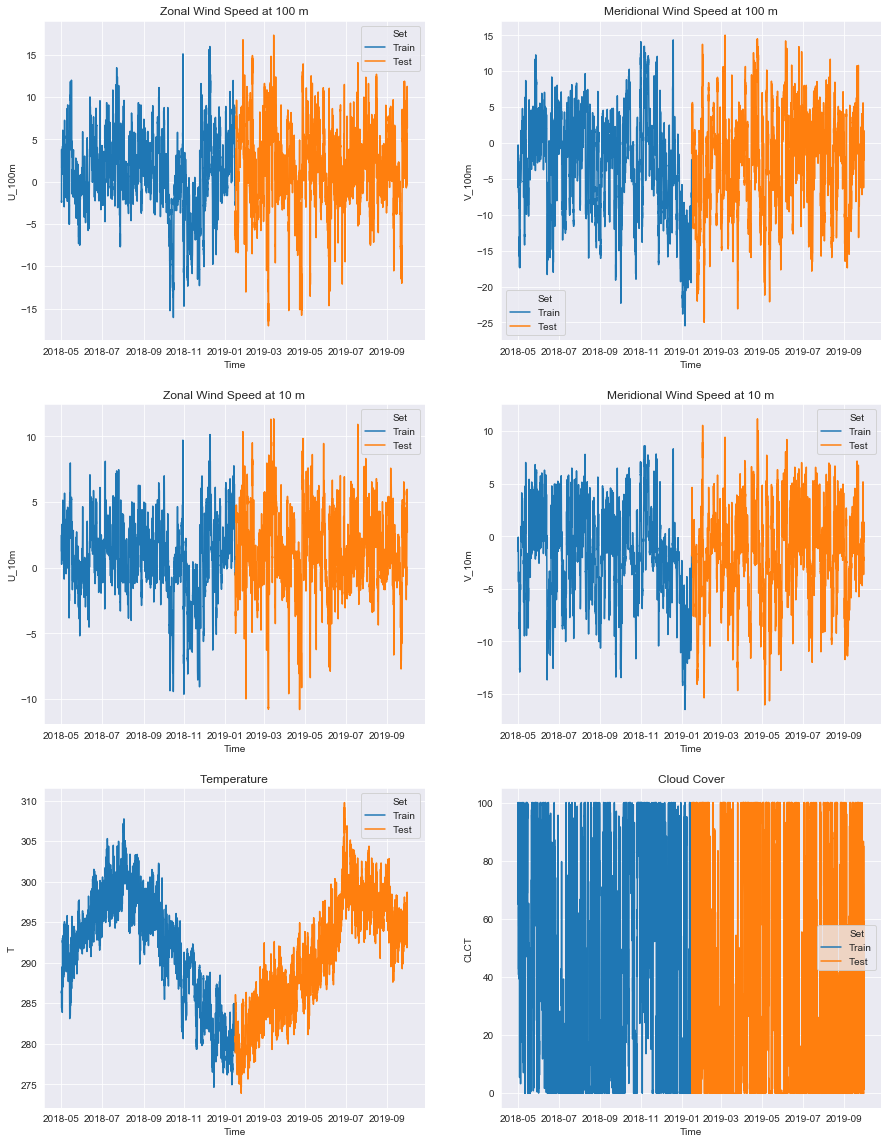

In [6]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.lineplot(wf['Time'],wf['U_100m'],hue=wf['Set'])
plt.title('Zonal Wind Speed at 100 m')
plt.subplot(3,2,2)
sns.lineplot(wf['Time'],wf['V_100m'],hue=wf['Set'])
plt.title('Meridional Wind Speed at 100 m')
plt.subplot(3,2,3)
sns.lineplot(wf['Time'],wf['U_10m'],hue=wf['Set'])
plt.title('Zonal Wind Speed at 10 m')
plt.subplot(3,2,4)
sns.lineplot(wf['Time'],wf['V_10m'],hue=wf['Set'])
plt.title('Meridional Wind Speed at 10 m')
plt.subplot(3,2,5)
sns.lineplot(wf['Time'],wf['T'],hue=wf['Set'])
plt.title('Temperature')
plt.subplot(3,2,6)
sns.lineplot(wf['Time'],wf['CLCT'],hue=wf['Set'])
plt.title('Cloud Cover')

On these graphics, it's possible to see the data on Train and Test are quite similar, which is a very good sign since it means that our model will try to predict data that is similar to the one it used to be trained.

Now, let`s do a little check on the Target Variable.

Text(0.5, 1.0, 'Energy Production')

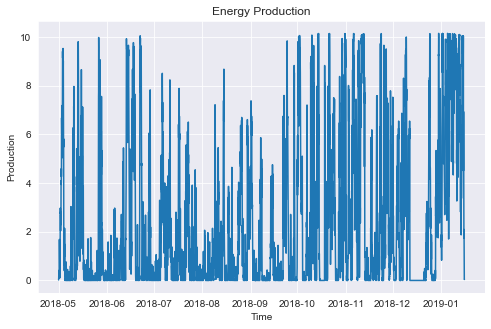

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x=wf[wf['Set']=='Train']['Time'],y=y_train['Production'])
plt.title('Energy Production')

Text(0.5, 1.0, 'Energy Production Distribution')

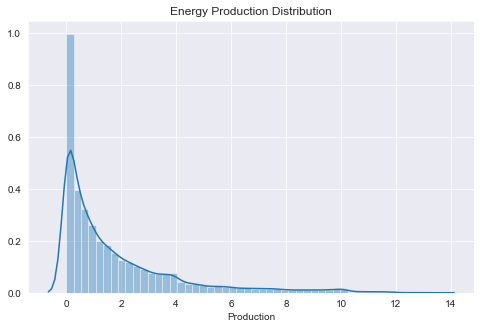

In [9]:
plt.figure(figsize=(8,5))
sns.distplot(y_train['Production'])
plt.title('Energy Production Distribution')

## Multivariate Analysis

Now, let`s try to find patterns and relations between features by first plotting a Pairplot from Seaborn and a Correlation Heatmap.

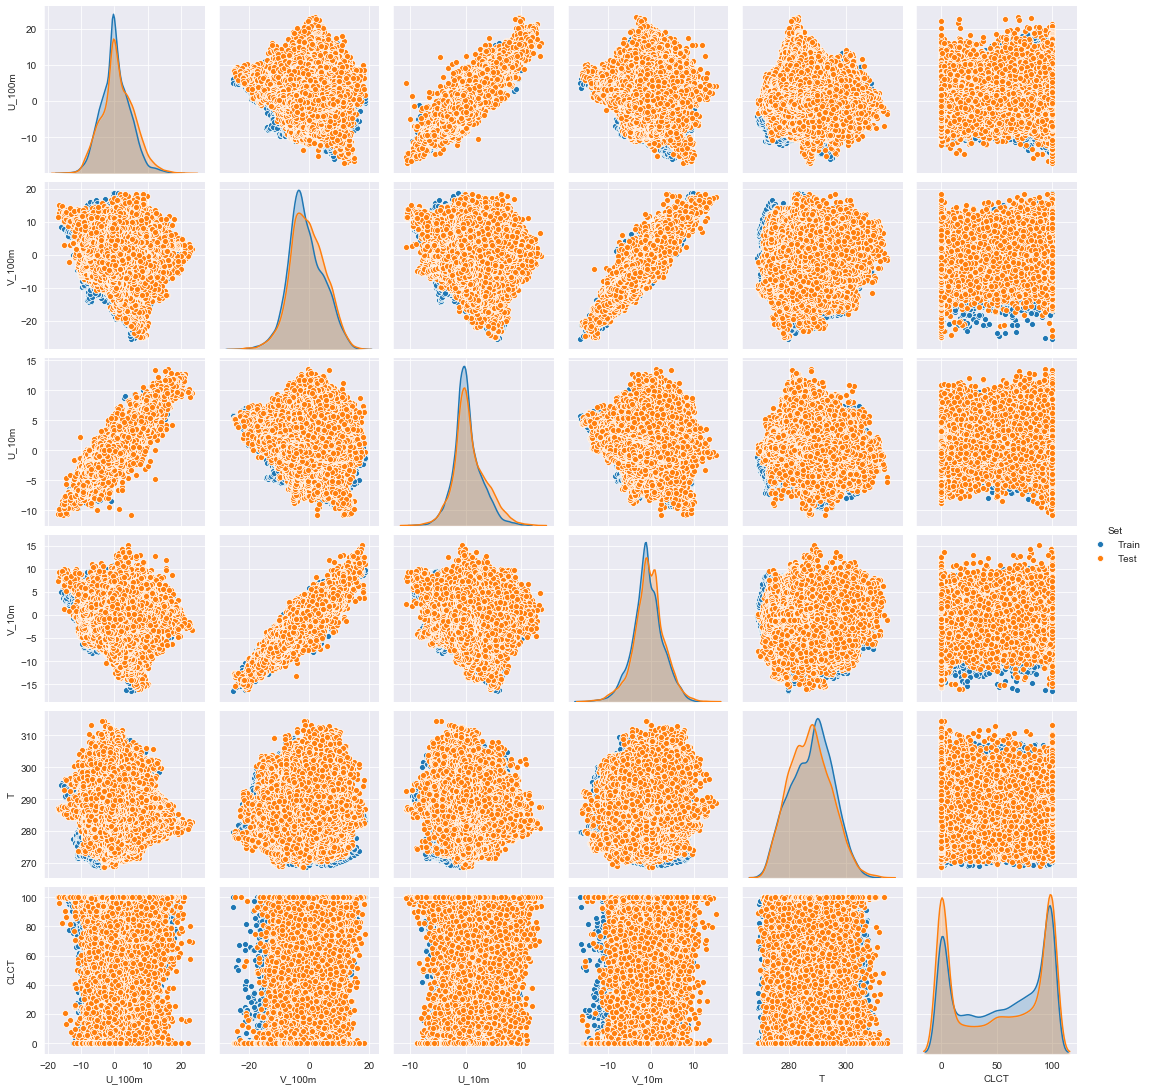

In [10]:
sns.pairplot(full_data[['U_100m','V_100m','U_10m','V_10m','T','CLCT','Set']],hue='Set')

Since CLCT variable is not normally distributed, we use here Spearman Correlation to plot a heatmap.

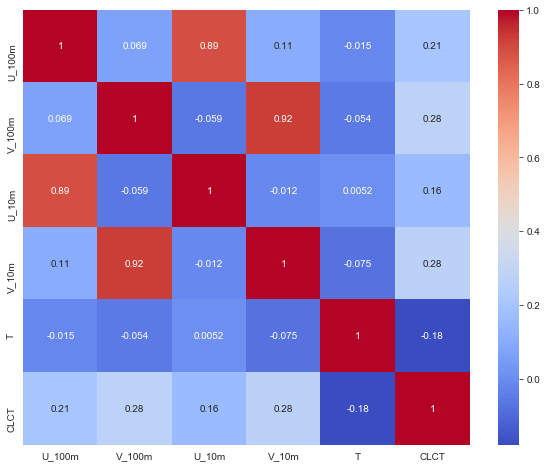

In [11]:
corr = full_data[['U_100m','V_100m','U_10m','V_10m','T','CLCT','Set']].corr('spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)

It`s possible to se some kind of positive correlations between the features pairs:

* U_100m and U_10m
* V_100m and V_10m

Let`s check it more closely.

For U_100m (Zonal Wind Speed at 100m) vs U_10m (Zonal Wind Speed at 10m):

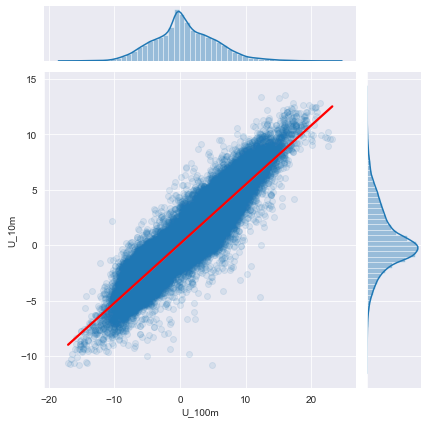

In [12]:
sns.jointplot(x='U_100m',y='U_10m',data=full_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

For V_100m (Meridional Wind Speed at 100m) vs V_10m (Meridional Wind Speed at 10m):

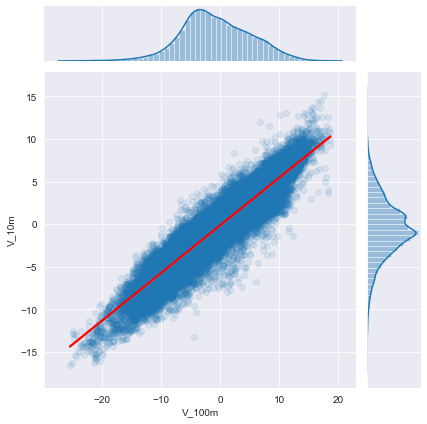

In [13]:
sns.jointplot(x='V_100m',y='V_10m',data=full_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

As it's possible to see, these features have some positive correlations between themselves, and this can be used later for Feature Engineering.

### Correlations between Train Data and Target

Now, let`s check if we can find any correlation between features and target. For this task, only Train Set will be used, and we also use Spearman Correlation.

In [14]:
train_data = pd.concat([full_data[full_data['Set']=='Train'],y_train['Production']],axis=1)

Text(0.5, 1.0, 'Features Correlation with Target')

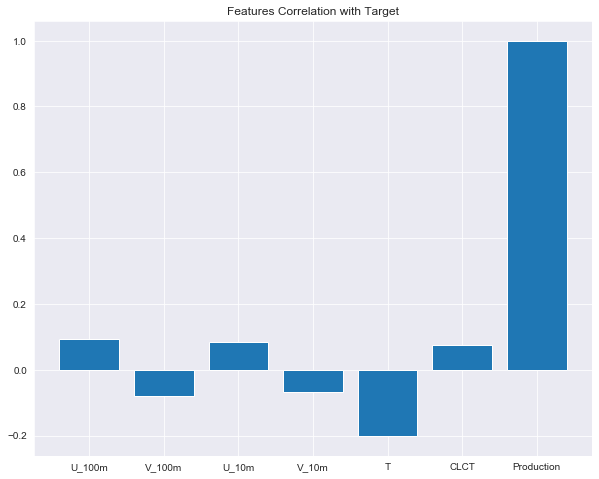

In [15]:
corr = train_data[['U_100m','V_100m','U_10m','V_10m','T','CLCT','Production']].corr('spearman')
plt.figure(figsize=(10,8))
plt.bar(corr.index,corr['Production'])
plt.title('Features Correlation with Target')

The more prominent correlations with the target involve the features U_100m, V_100m and T. This information can sugest that in most cases, the Wind Farms considered on this problem are headed towards latitutinal orientations (East or West). Let's plot those variables.

For U_100m vs Production:

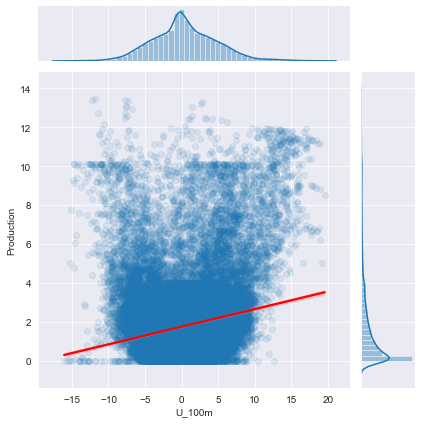

In [16]:
sns.jointplot(x='U_100m',y='Production',data=train_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

For V_100m vs Production:

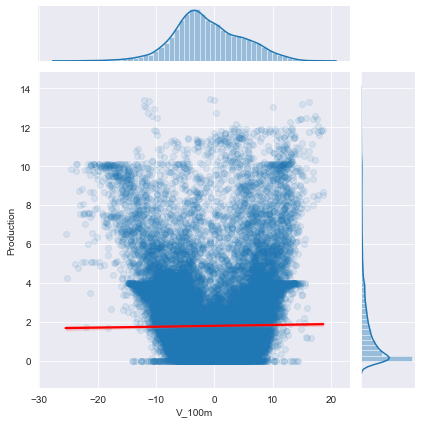

In [17]:
sns.jointplot(x='V_100m',y='Production',data=train_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

For T vs Production:

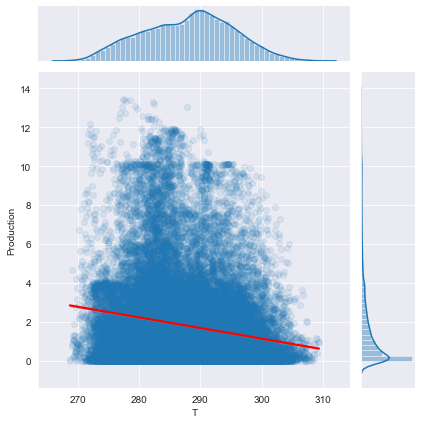

In [18]:
sns.jointplot(x='T',y='Production',data=train_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

All of these correlatons, however, appears to be spurious. That makes the prediction more difficult and show that the Feature Engineering will be a important factor here.

### Analysis by Wind Farm

Finally, since we have more than One Wind Farm considered on the data, let`s analyze some variables behaviours by Wind Farm. For this task, we will use only Train Set.

Text(0.5, 1.0, 'Energy Production by Wind Farm')

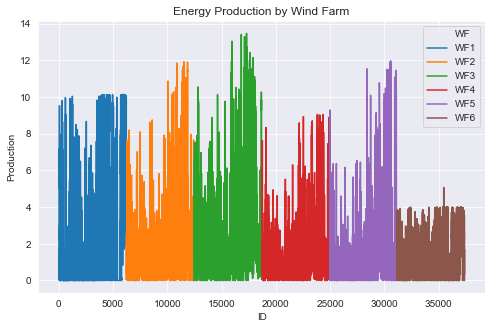

In [19]:
plt.figure(figsize=(8,5))
sns.lineplot(x='ID',y='Production',data=train_data,hue='WF')
plt.title('Energy Production by Wind Farm')

<Figure size 720x720 with 0 Axes>

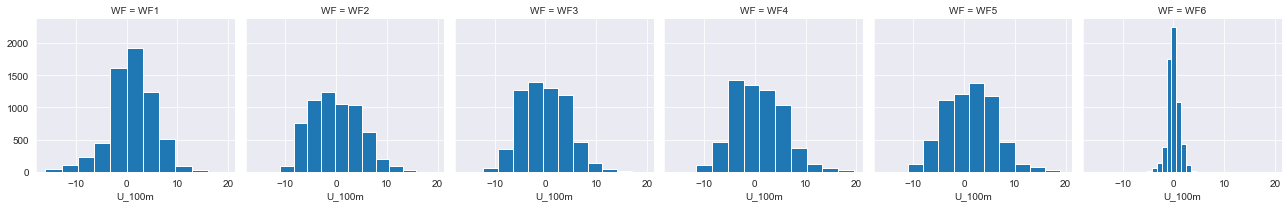

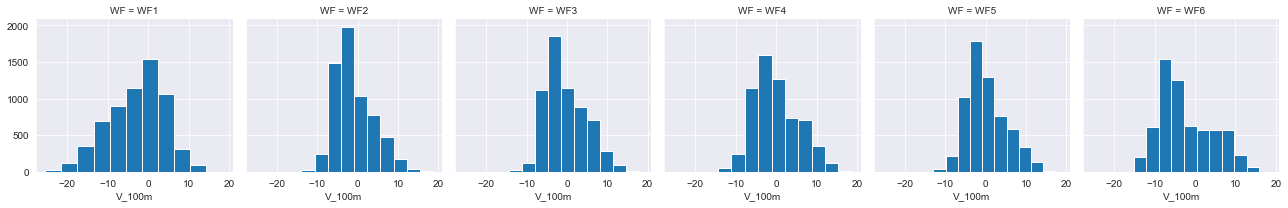

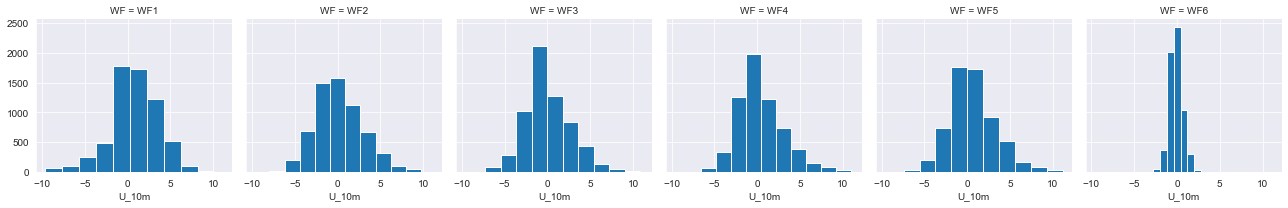

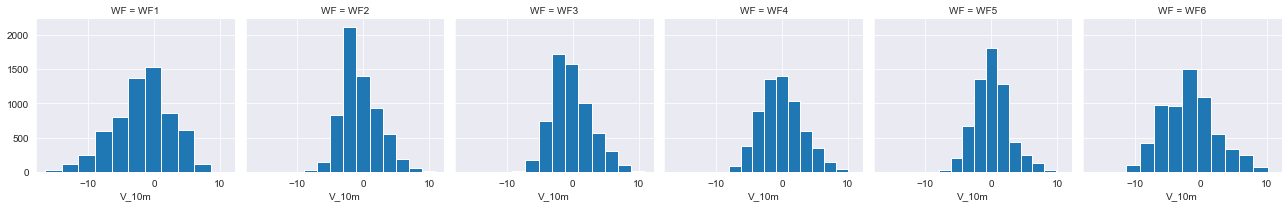

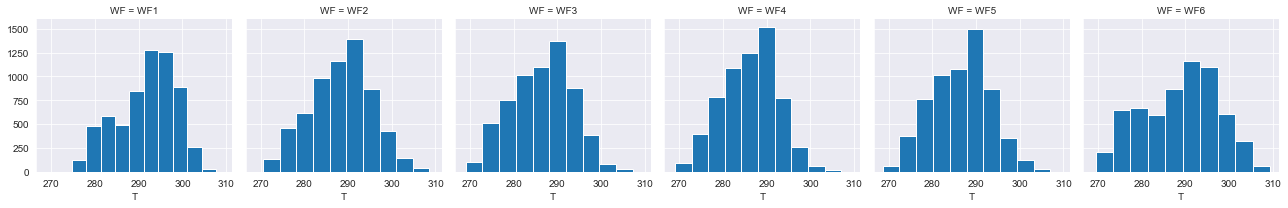

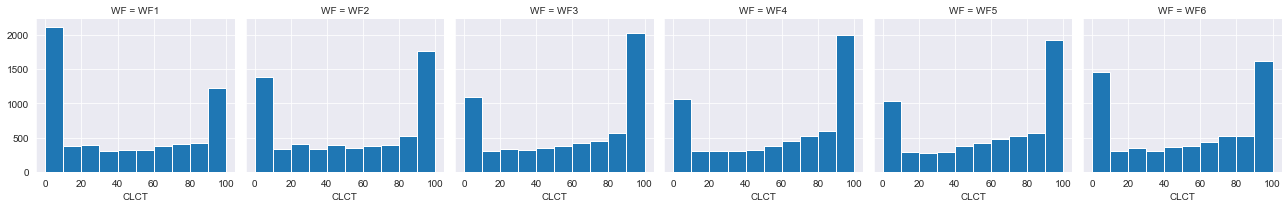

In [20]:
plt.figure(figsize=(10,10))
g1 = sns.FacetGrid(train_data,col='WF')
g1.map(plt.hist,'U_100m')

g2 = sns.FacetGrid(train_data,col='WF')
g2.map(plt.hist,'V_100m')

g3 = sns.FacetGrid(train_data,col='WF')
g3.map(plt.hist,'U_10m')

g4 = sns.FacetGrid(train_data,col='WF')
g4.map(plt.hist,'V_10m')

g5 = sns.FacetGrid(train_data,col='WF')
g5.map(plt.hist,'T')

g6 = sns.FacetGrid(train_data,col='WF')
g6.map(plt.hist,'CLCT')

It's clear that each Wind Farm have it's own characteristics, but we can get some general insights from the graphics:

* Wind Speeds are generally Values between 10 and -10;
* Wind Farm 6 has low values for Zonal Wind, which may indicate that it's turbines are oriented towards Meridional Directions (North or South). But at the same time, Wind Farm 6 is the one with less Energy Production;
* As a more stable variable, Temperature is similar for all Wind Farms;
* Except from Windf Farm 1, the weather generally has clouds for the others Wind Farms;

## Validation Strategy                                    

To finish EDA, let's try to define the strategy of Validation of the Model that's going to be used, based on the knowledge obtained by the constructed graphics.

First things first, as we have a time-based data, it's obvious that a good validation for the problem has to be a Time Based Validation. To avoid biased Test Set, we propose to use a specific Cross Validation called Nested Cross Validation, which can be seen on the figure below.

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/1464/1*5vky1z29e1iO6iOvCTBJxg.png")

As detailed in the picture, the technique consists of doing multiple splits advanced on time, and in the end it averages all the split's test error to obtain a robust measure of the Test Error.

In our case, where we already have a splitted data on Training and Test Set, we can start using the whole Training data, for example, to predict the first month in Test set for the first split. The second split can take the whole Training data + First Test set month to predict the Second Month on Test Set, and so on.

About the splits, as the data in Training and Test set are quite similar, we won't select the splits for specific months for the Train/Validation/Test sets.

And, as a important note to remember, the Hyperparameter tuning have to be made on a Validation Set with less columns than Training data, containing only the columns presented on the Test set. This is important to have a Validation method which provide realistic precision metrics similar to the Leaderboard of the competition. So, using the Raw or Simplified Data, this will has to be considered on the Validations procedures. 

An also important thing to make a more realistic validation is to not use rows filled by Interpolation to Validate the data. Even if it's possible to do the same on Test Data, it won't be possible on the Leaderboard data. Maybe, in practical terms, this may lead to abandon the idea of interpolating predictions from NWP's.